<a href="https://colab.research.google.com/github/HermonaDev/Handwritten-Digit-Recognizer/blob/main/DigitRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HandWritten Digit Recognizer

## Introduction
In this project we will develop a model using a Supervised learning Algorithm SVM (Support Vector Machines) that classifies data by finding an optimal line or hyperplane that maximizes the distance between each class in an N-dimensional space.

### Data Description
The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

## Setting Up Environment

In [1]:
import numpy as np
import pandas as pd
import math
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import decomposition

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd '/content/drive/My Drive/HandWritten-Digit-Recognition'

/content/drive/My Drive/HandWritten-Digit-Recognition


In [4]:
ls

digit-recognizer/  DigitRecognizer.ipynb


## Importing Data

In [5]:
train_set = pd.read_csv("digit-recognizer/train.csv")
test_set = pd.read_csv("digit-recognizer/test.csv")

## Exploratory Data Analysis

In [6]:
train_set.shape

(42000, 785)

In [7]:
test_set.shape

(28000, 784)

In [8]:
train_set.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test_set.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Check any null or missing values

In [10]:
train_set.isnull()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
train_set.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [12]:
# Check any null or missing values in test set
test_set.isnull()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
27996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
27997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
27998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
test_set.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [14]:
train_set.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [15]:
test_set.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [16]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [17]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [18]:
order = list(np.sort(train_set['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### Visualization
Count vs Number of Class

<ipython-input-19-c55aebdd12a5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_set, x="label", palette='Blues', order=order)


<Axes: xlabel='label', ylabel='count'>

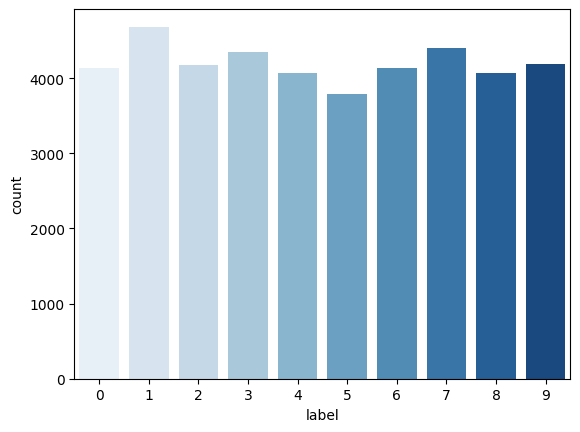

In [19]:
sns.countplot(data=train_set, x="label", palette='Blues', order=order)

<ipython-input-20-08b17b0b5d13>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x=train_set["label"], palette='RdPu')


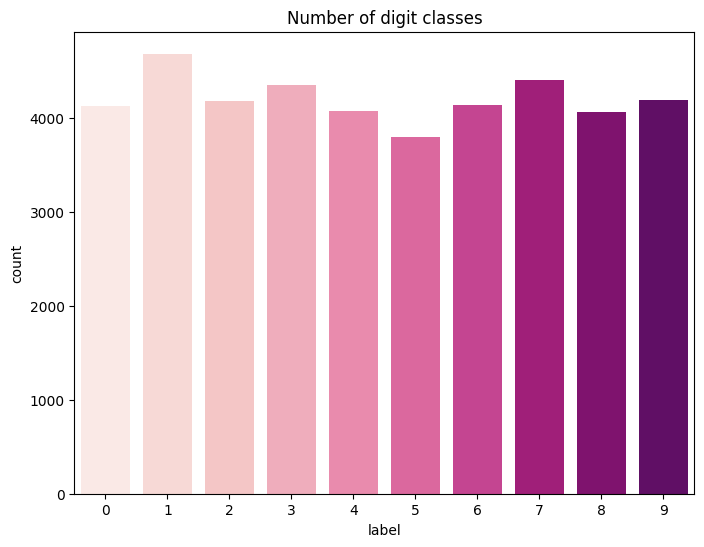

In [20]:
plt.figure(figsize=(8, 6))
plot = sns.countplot(x=train_set["label"], palette='RdPu')
plt.title('Number of digit classes')
plt.show()


### Examples

To be able to see the actual digits, we need to convert the samples into matrix

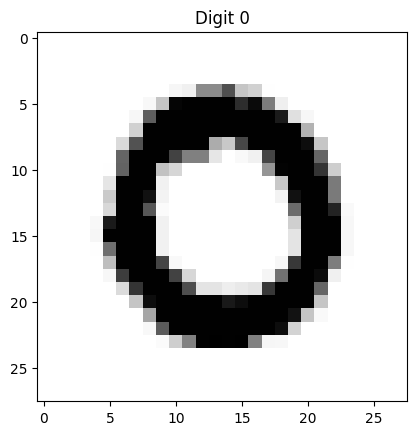

In [21]:
# Extract the pixel values for digit 0 into 28x28 grid pixel
zero = train_set.iloc[1, 1:].values.reshape(28, 28)

# Display the image of digit 0
plt.figure()
plt.imshow(zero, cmap='Greys')
plt.title("Digit 0")
plt.show()

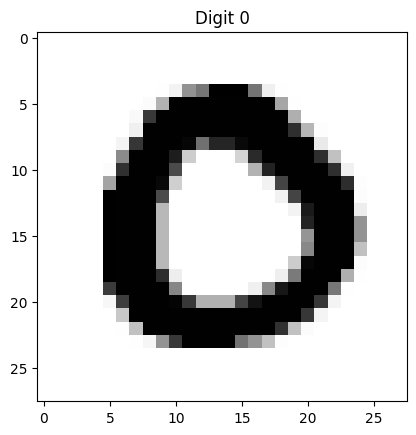

In [22]:
zero = train_set.iloc[4, 1:].values.reshape(28, 28)

plt.figure()
plt.imshow(zero, cmap='Greys')
plt.title("Digit 0")
plt.show()

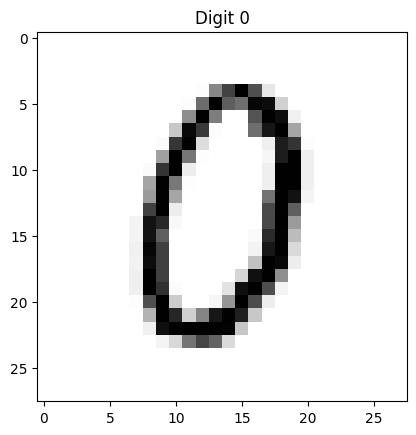

In [23]:
zero = train_set.iloc[5, 1:].values.reshape(28, 28)

plt.figure()
plt.imshow(zero, cmap='Greys')
plt.title("Digit 0")
plt.show()

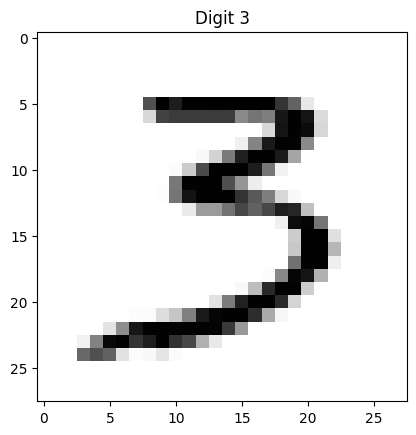

In [24]:
three = train_set.iloc[25, 1:].values.reshape(28, 28)

plt.figure()
plt.imshow(three, cmap='Greys')
plt.title("Digit 3")
plt.show()

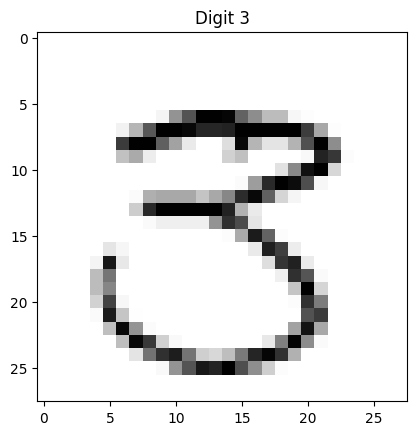

In [25]:
three = train_set.iloc[7, 1:].values.reshape(28, 28)

plt.figure()
plt.imshow(three, cmap='Greys')
plt.title("Digit 3")
plt.show()

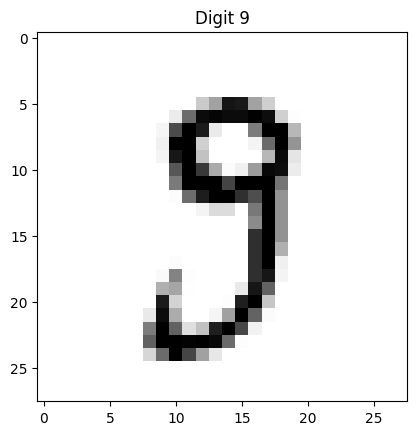

In [26]:
nine = train_set.iloc[40, 1:].values.reshape(28, 28)

plt.figure()
plt.imshow(nine, cmap='Greys')
plt.title("Digit 9")
plt.show()

## Data Preparation/ Cleaning

### Dropping a Column

In [27]:
y = train_set['label']

In [28]:
X = train_set.drop(columns = 'label')

### Normalization

In [29]:
X = X/255.0
test_set /= 255.0

print("X:", X.shape)
print("test_data:", test_set.shape)

X: (42000, 784)
test_data: (28000, 784)


### Rescaling

In [30]:
from sklearn.preprocessing import scale
X_rescaled = scale(X)

### Split Dataset

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_rescaled, y, test_size=0.3, random_state=10)

### Dimensionality Reduction with PCA

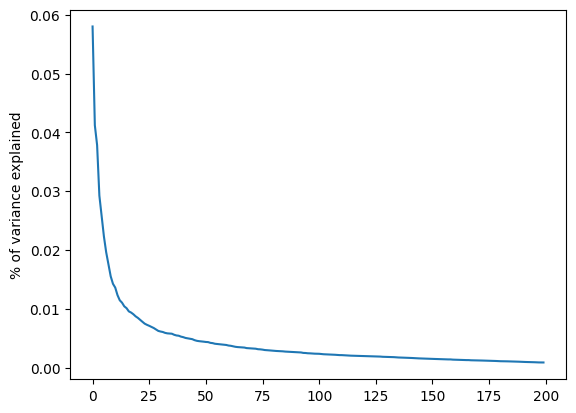

In [32]:
pca = decomposition.PCA(n_components=200)
pca.fit(X_train)
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('% of variance explained')
plt.show()

In [33]:
# Optimal number of PCs to use
pca = decomposition.PCA(n_components=100)
pca.fit(X_train)
PCtrain = pca.transform(X_train)
PCtest = pca.transform(test_set)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


## Model Building

Will be using SVM, SVMs can handle both linearly separable and non-linearly separable data. They do this by using different types of kernel functions, such as the linear kernel, polynomial kernel or radial basis function (RBF) kernel. These kernels enable SVMs to effectively capture complex relationships and patterns in the data.

After building both models, we will compare the accuracies

### Linear Model

In [34]:
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [35]:
y_pred_linear = model_linear.predict(X_test)

#### Evaluate model performance with the Metrics

In [36]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Accuracy
print("Accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_linear), "\n")

Accuracy: 0.9163492063492064 



In [37]:
# Confusion Matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_linear))

[[1155    0    6    2    3    7    8    2    4    1]
 [   0 1386    4    3    2    1    0    3   14    0]
 [   9   16 1154   23   11    6    6    7   23    5]
 [   7    5   42 1207    1   44    2    4   15    4]
 [   4    5   14    5 1143    2    5    3    3   34]
 [   5   17   13   65    5  982   12    2   36   12]
 [  12    1   20    0   10   16 1159    0    1    0]
 [   1    7   13   13   19    1    1 1240    6   29]
 [  10   36   24   53    9   43    7    3 1017   15]
 [   7    6    9   24   57    3    0   52   14 1103]]


### Non-linear Model
We will be using Gaussian (RBF) Kernel Function K(x, y) = exp(-gamma * ||x - y||^2) with default hyperparameter values

In [38]:
non_linear_model = SVC(kernel='rbf')
non_linear_model.fit(X_train, y_train)

SVC()

In [39]:
y_pred_nl = non_linear_model.predict(X_test)

## Evaluating the Model

In [40]:
# Accuracy
print("Accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_nl), "\n")

Accuracy: 0.9557936507936508 



In [41]:
# Confusion Matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_nl))

[[1169    0    3    1    0    0    5    5    5    0]
 [   0 1392    6    3    2    0    1    5    4    0]
 [   3    3 1208    9    5    1    6   18    7    0]
 [   1    1   16 1266    1   11    1   24    8    2]
 [   1    3   14    0 1167    2    8    8    2   13]
 [   0    3    2   19    3 1088   11   10    9    4]
 [   9    1    7    0    2    7 1175   15    3    0]
 [   2    9    6    2   11    1    1 1280    1   17]
 [   4   14   12   18    7   12    2   10 1129    9]
 [   3    3    4   22   21    1    0   45    7 1169]]


The linear model gives approx. 91% accuracy while The non-linear model gives approx. 95% accuracy. So now we will fine tune the model to find optimal values of the hyperparameters (gamma and C) and consequently increase our accuracy.

## Fine Tuning the hyperparameter

In [60]:
from sklearn.model_selection import train_test_split

# Assume X_train, y_train are your training data
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [56]:
from sklearn.svm import SVC

In [57]:
param_combinations = [
    {'C': 5, 'gamma': 0.01},
     {'C': 1, 'gamma': 0.001},
    {'C': 10, 'gamma': 0.001},
    {'C': 15, 'gamma': 0.001},
    {'C': 100, 'gamma': 0.001},
    {'C': 1, 'gamma': 0.0001},
    {'C': 5, 'gamma': 0.0001},
    {'C': 10, 'gamma': 0.0001},
    {'C': 100, 'gamma': 0.0001}
]

In [58]:
results = []

In [ ]:
for params in param_combinations:
    model = SVC(kernel='rbf', **params)
    model.fit(X_train, y_train)
    accuracy = model.score(X_val, y_val)
    results.append({'params': params, 'accuracy': accuracy})
    print("one cycle.......")

In [63]:
print(results)

[{'params': {'C': 5, 'gamma': 0.01}, 'accuracy': 0.8273809523809523}, {'params': {'C': 1, 'gamma': 0.001}, 'accuracy': 0.9545918367346938}, {'params': {'C': 10, 'gamma': 0.001}, 'accuracy': 0.9636054421768707}, {'params': {'C': 15, 'gamma': 0.001}, 'accuracy': 0.963265306122449}, {'params': {'C': 100, 'gamma': 0.001}, 'accuracy': 0.9634353741496599}, {'params': {'C': 1, 'gamma': 0.0001}, 'accuracy': 0.9290816326530612}, {'params': {'C': 5, 'gamma': 0.0001}, 'accuracy': 0.9392857142857143}, {'params': {'C': 10, 'gamma': 0.0001}, 'accuracy': 0.9421768707482994}, {'params': {'C': 100, 'gamma': 0.0001}, 'accuracy': 0.9464285714285714}]


In [66]:
best_params = max(results, key=lambda x: x['accuracy'])['params']

In [72]:
print(f"The best test score is {best_params}")

The best test score is {'C': 10, 'gamma': 0.001}


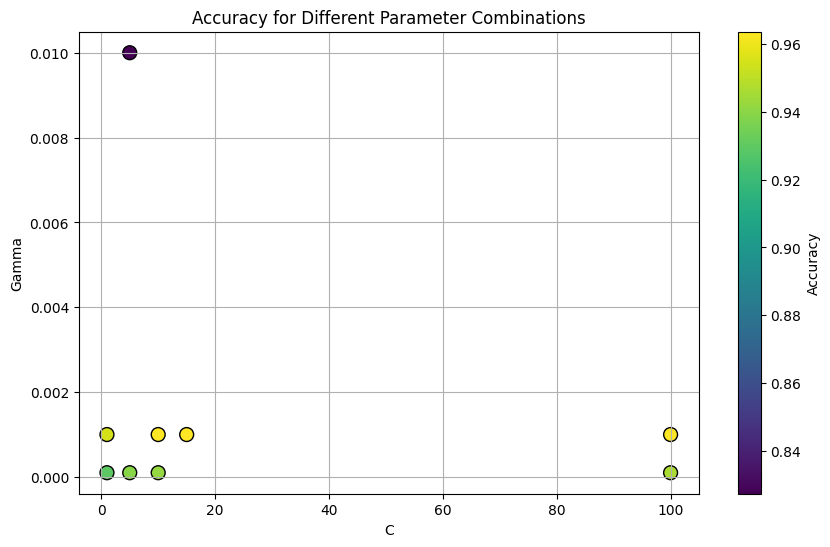

In [75]:
# Extract parameters and accuracies
params_list = [result['params'] for result in results]
accuracies = [result['accuracy'] for result in results]

# Extract C and gamma values for plotting
C_values = [params['C'] for params in params_list]
gamma_values = [params['gamma'] for params in params_list]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(C_values, gamma_values, c=accuracies, cmap='viridis', s=100, edgecolors='k')
plt.colorbar(label='Accuracy')
plt.xlabel('C')
plt.ylabel('Gamma')
plt.title('Accuracy for Different Parameter Combinations')
plt.grid(True)
plt.show()


The combinations with C around 10 and gamma around 0.001 seem to strike a good balance between bias and variance, achieving high accuracy without significant signs of overfitting or underfitting.

### The Final Model

In [76]:
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9603968253968254 

[[1165    0    3    1    0    2    5    5    4    3]
 [   0 1395    4    2    2    0    1    5    4    0]
 [   4    6 1210    7    5    2    5   14    6    1]
 [   2    0    8 1271    1   16    0   21    9    3]
 [   1    2   13    0 1181    1    6    6    1    7]
 [   0    2    0   16    2 1096   11    9   11    2]
 [  10    1    5    0    4    3 1180   14    2    0]
 [   2    8    8    3   14    0    0 1280    1   14]
 [   6   13   14   14    8    9    2    7 1136    8]
 [   1    4    2   17   20    0    1   39    4 1187]] 



## Saving the Model

In [77]:
import pickle

In [78]:
pickle.dump(model, open('model.pkl', 'wb'))

In [79]:
saved_model = pickle.load(open('model.pkl', 'rb'))
saved_model.predict(X_test)

array([7, 3, 9, ..., 1, 0, 1])

## And We are Done!!
